In [1]:
# Useful starting lines
import numpy as np
from helpers import *
from methods import *
from process_data import *
from crossvalidation import *
from select_parameter import *

from matplotlib import pyplot as plt    
%load_ext autoreload
%autoreload 2

seed=10

In [2]:
from zipfile import ZipFile 
  
# # specifying the zip file name 
file_name = 'Data/test.csv.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Data/') 

In [18]:
def best_degree_lamb_selection(degrees, lambdas, alphas, k_fold, y, tx, seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    comparison = []

    for degree in degrees:
        for lamb in lambdas:
            for alpha in alphas:
                accs_test = []
                for k in range(k_fold):
                        print(degree,lamb,alpha)
                        _, acc_test = cross_validation(y, tx, ridge_regression, k_indices, k, degree, alpha, lamb)
                        accs_test.append(acc_test)
                        comparison.append([degree,lamb,alpha,np.mean(accs_test)])
    
    comparison = np.array(comparison)    
    best_degree = comparison[:,0]
    best_lamb = comparison[:,1]
    best_alpha = comparison[:,2]
    accu = comparison[:,3]
   
    return best_degree, best_lamb, best_alpha, accu


def select_parameters_ridge_regression(y,tX,degrees,lambdas,alphas,k_fold,seed):  
    par_degree = []
    par_lamb = []
    par_alpha = []
    accus = []

    # split in 4 subsets the training set
    msk_jets = get_jet_masks(tX)

    for idx in range(len(msk_jets)):
        tx = tX[msk_jets[idx]]
        ty = y[msk_jets[idx]]
        
        degree,lamb,alpha,accu = best_degree_lamb_selection(degrees, lambdas, alphas, k_fold, ty, tx, seed)
        par_degree.append(degree)
        par_lamb.append(lamb)
        par_alpha.append(alpha)
        accus.append(accu)

    return par_degree, par_lamb, par_alpha, accus

""" for least square """
def best_degree_selection(degrees, k_fold, y, tx, alpha, seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    comparison = []

    for deg in degrees:
        # cross validation
        degree = [deg]*4
        accs_test = []
        for k in range(k_fold):
          _, acc_test = cross_validation_least_squares(y, tx, k_indices, k, degrees, alpha)
          accs_test.append(acc_test)
        comparison.append([deg,np.mean(accs_test)])
    
    comparison = np.array(comparison)
    ind_best =  np.argmax(comparison[:,1])      
    best_degree = comparison[ind_best,0]
    accu = comparison[ind_best,1]
   
    return best_degree, accu
    
def select_parameters_least_squares(y,tX,degrees,alpha,k_fold,seed):  
    par_degree = []
    accus = []

    # split in 4 subsets the training set
    msk_jets = get_jet_masks(tX)

    for idx in range(len(msk_jets)):
        tx = tX[msk_jets[idx]]
        ty = y[msk_jets[idx]]
        
        degree, accu = best_degree_selection(degrees, k_fold, ty, tx, alpha,seed)
        par_degree.append(degree)
        accus.append(accu)

    return par_degree,  accus

In [3]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

In [4]:
x_train, x_test = process_data(tX, tX_test, 0)
x_train, x_test = phi(x_train, x_test, 0)

In [22]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees_candidates = [6,7,8,9,10]
alphas_candidates=[2,3,4,5,6]
lambdas_candidates = np.logspace(-7,-1,7)
#lambdas_candidates=[1e-5]


k_fold = 2
par_degree, par_lambda, par_alpha, accu = select_parameters_ridge_regression(y,tX,degrees_candidates,lambdas_candidates,
                                                                  alphas_candidates,k_fold,seed)
par_degree, par_lambda, par_alpha, accu

6 1e-07 2
0.8523100328288894 0.8499479541996957
6 1e-07 2
0.8526503322924174 0.8506685883577548
6 1e-06 2
0.8523700856753943 0.850048042277204
6 1e-06 2
0.8525702618304107 0.8503883417407319
6 1e-05 2
0.8515093282088237 0.8502282008167187
6 1e-05 2
0.8527504203699255 0.8503082712787253
6 0.0001 2
0.8512290815918008 0.8498879013531908
6 0.0001 2
0.8525502442149091 0.8501481303547122
6 0.001 2
0.8507886940507646 0.8495275842741613
6 0.001 2
0.8519697333653615 0.8494875490431579
6 0.01 2
0.8500680598927056 0.8486067739610857
6 0.01 2
0.8502882536632237 0.8485467211145808
6 0.1 2
0.8477059812635119 0.8466050124109216
6 0.1 2
0.8479061574185283 0.8477259988790136
6 1e-07 2
0.8225523573712988 0.8164912823687197
6 1e-07 2
0.8203600536469617 0.8165944496028061
6 1e-06 2
0.8227844836479934 0.8164139069431549
6 1e-06 2
0.820076343753224 0.8166202414113277
6 1e-05 2
0.8224233983286908 0.8164654905601981
6 1e-05 2
0.820076343753224 0.8168523676880223
6 0.0001 2
0.8223202310946044 0.816284947900546

([array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]),
  array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]),
  array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])],
 [array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
         1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01]),
  array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
         1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01]),
  array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
         1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01])],
 [array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
  array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
  array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])],
 [array([0.84994795, 0.85030827, 0.85004804, 0.85021819, 0.8502282 ,
         0.85026824, 0.8498879 , 0.85001802, 0.84952758, 0.84950757,
         0.84860677, 0.84857675, 0.84660501, 0.84716551]),
  

[array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
       1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01]), array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
       1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01]), array([1.e-07, 1.e-07, 1.e-06, 1.e-06, 1.e-05, 1.e-05, 1.e-04, 1.e-04,
       1.e-03, 1.e-03, 1.e-02, 1.e-02, 1.e-01, 1.e-01])]


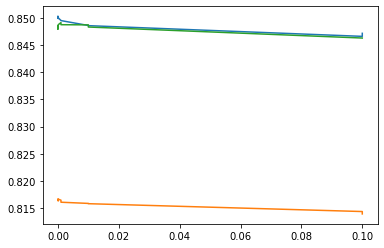

In [30]:
for l in range(len(par_lambda)):
    plt.plot(par_lambda[l],accu[l])

In [24]:
L = []
initial_w = np.zeros(x_train.shape[1])
for fun in [least_squares_SGD,least_squares_GD]:
    _, loss = fun(y,x_train, plot=True, gamma=0.0001)
    L.append(loss)

SGD(0/49): loss=153.55990322547078
SGD(10/49): loss=139.38350357569317


KeyboardInterrupt: 

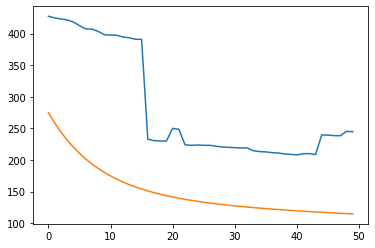

In [16]:
for i in range(len(L)):
    plt.plot(L[i])